# scaffolding of de novo genome assemblies

In [ ]:
import time

import cooler

import trackc as tc

In [2]:
clr = cooler.Cooler("contig_bin.mcool::/resolutions/500000")

## random contig order

no max min range
maxrange: 36.0 minrange: 1.0


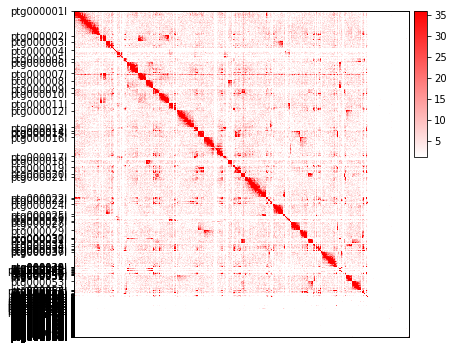

In [3]:
fig, axs = tc.make_spec(figsize=(6, 6), width_ratios=[1], wspace=0.2)

mat = clr.matrix(balance=False)[:]
tc.pl.mapC(ax=axs[0], mat=mat, map_type="squ", symmetric=True)
chromstarts = [clr.extent(i)[0] for i in clr.chromnames]
_ = axs[0].set(yticks=chromstarts, yticklabels=clr.chromnames)
# tc.savefig('all_chrom_cmap.pdfx')

## genome level chrom reorder

In [5]:
import pandas as pd


def agp2regions(agp_order):
    agp_order = agp_order.query('Contig_start != "contig"')
    minus_strand_i = agp_order.query('Orientation=="-"').index

    agp_order["base0_start"] = agp_order["Contig_start"].astype(int) - 1
    agp_order["base0_end"] = agp_order["Contig_end"].astype(int) - 1

    agp_order.loc[minus_strand_i, "base0_start"] = (
        agp_order.loc[minus_strand_i, "Contig_end"].astype(int) - 1
    )
    agp_order.loc[minus_strand_i, "base0_end"] = (
        agp_order.loc[minus_strand_i, "Contig_start"].astype(int) - 1
    )

    agp_order = agp_order.sort_values(by=["Chromosome", "Order"])
    agp_order["region"] = (
        agp_order["Contig_ID"]
        + ":"
        + agp_order["base0_start"].astype(str)
        + "-"
        + agp_order["base0_end"].astype(str)
    )
    return agp_order


reorder = pd.read_table(
    "/Volumes/work/my_project/trackc_data/reorder_assembly.build.ScafInChr.agp"
)
reorder = agp2regions(reorder)

draft_order = pd.read_table(
    "/Volumes/work/my_project/trackc_data/assembly.build.ScafInChr.agp"
)
draft_order = agp2regions(draft_order)

In [6]:
display(reorder.shape)
display(reorder.head(2))

display(draft_order.shape)
display(draft_order.head(2))

(124, 12)

,Chromosome,Start,End,Order,Tag,Contig_ID,Contig_start,Contig_end,Orientation,base0_start,base0_end,region
0,chr01,1,987280,1,W,ptg000085l,1,987280,-,987279,0,ptg000085l:987279-0
2,chr01,987381,1359846,3,W,ptg000148l,1,372466,+,0,372465,ptg000148l:0-372465


(118, 12)

,Chromosome,Start,End,Order,Tag,Contig_ID,Contig_start,Contig_end,Orientation,base0_start,base0_end,region
73,chr0,1,990127,1,W,ptg000038l,1,990127,-,990126,0,ptg000038l:990126-0
75,chr0,990228,1977507,3,W,ptg000085l,1,987280,-,987279,0,ptg000085l:987279-0


In [9]:
start_time = time.time()

draft_mat = tc.tl.extractContactRegions(
    clr=clr,
    row_regions=draft_order["region"].to_list(),
)

time.time() - start_time

729.9237818717957

In [10]:
start_time = time.time()

redorder_mat = tc.tl.extractContactRegions(
    clr=clr,
    row_regions=reorder["region"].to_list(),
)
time.time() - start_time

730.2075889110565

no max min range
maxrange: 36.0 minrange: 1.0
no max min range
maxrange: 37.0 minrange: 1.0


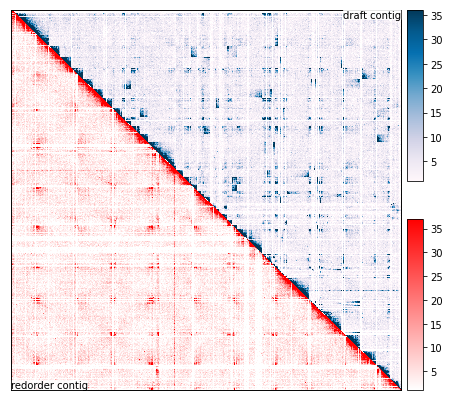

In [12]:
ten = tc.tenon(figsize=(7, 1))
ten.add(pos="bottom", height=7)
tc.pl.mapC(
    ax=ten.axs(0),
    mat=draft_mat.cmat,
    mat2=redorder_mat.cmat,
    label=["draft contig", "redorder contig"],
    cmap=["PuBu", tc.pa.fruitpunch],
    map_type="squ",
)

In [145]:
def chrom_ticks(ax, ticks, ticklabels, xmax):
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    ax.xaxis.tick_top()
    ax.xaxis.set_label_position("top")
    ax.xaxis.set_ticks_position("top")

    # 显示 X 轴刻度线和标签
    ax.xaxis.set_tick_params(which="both", direction="in", length=30)
    ax.yaxis.set_visible(False)

    ax.set_xticks(ticks)
    _ = ax.set_xticklabels(ticklabels, rotation=45, ha="left", va="top")
    ax.set_xlim(0, xmax)

no max min range
maxrange: 37.0 minrange: 1.0
ptg000082l:0-880865 not in origion regions
ptg000136l:0-855400 not in origion regions
ptg000181l:0-853511 not in origion regions
ptg000111l:0-825641 not in origion regions
ptg000147l:0-816214 not in origion regions
ptg000100l:0-786175 not in origion regions
ptg000096l:0-755976 not in origion regions
ptg000086l:0-676540 not in origion regions
ptg000065l:0-627435 not in origion regions
ptg000064l:0-623941 not in origion regions
ptg000134l:0-607122 not in origion regions
ptg000135l:0-553689 not in origion regions
ptg000080l:0-504392 not in origion regions
ptg000106l:0-491285 not in origion regions
ptg000076l:0-488970 not in origion regions
ptg000173l:0-485675 not in origion regions
ptg000179l:0-485394 not in origion regions
ptg000107l:0-442701 not in origion regions
ptg000079l:0-440401 not in origion regions
ptg000162l:0-418422 not in origion regions
ptg000601l:0-382432 not in origion regions
ptg000265l:0-354123 not in origion regions
ptg00016

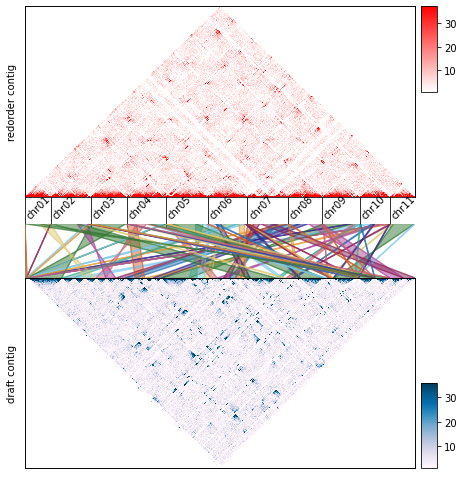

In [148]:
ten = tc.tenon(figsize=(7, 1))
ten.add(pos="bottom", height=3.5)
ten.add(pos="bottom", height=0.5)
ten.add(pos="bottom", height=1)
ten.add(pos="bottom", height=3.5)


tc.pl.mapC(
    ax=ten.axs(0), mat=redorder_mat.cmat, label="redorder contig", map_type="tri"
)

chrom_ticks(
    ten.axs(1),
    reorder_chromsizes["start"],
    reorder_chromsizes.index,
    reorder_chromsizes["End"].sum(),
)


tc.pl.zoomin(
    ax=ten.axs(2),
    raw_regions=reorder["region"].to_list(),
    zoomin_regions=draft_order["region"].to_list(),
    line_on=True,
    fill=True,
    alpha=0.5,
)

tc.pl.mapC(
    ax=ten.axs(3),
    mat2=draft_mat.cmat,
    label="draft contig",
    cmap="PuBu",
    map_type="tri",
)

# tc.savefig('reorder_contig.pdf')